
## Introdução
### Contexto

O presentre treinamento tem como objetivo demonstrar a utilização *end-to-end* da plataforma **SDP (Semantix Data Plataform)** em uma tarefa de ciência de dados, apresentando etapas desde a  digitalização e visualização dos dados até a criação de algortimos de *Machine Learning*.

Para tanto, será utilizado o dataset [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package), o qual iremos trabalhar em modelos de classificação, com o entuíto de através de dados históricos, predizer se no dia seguinte ocorreu ou não chuva na Australia. 

<center><img src="Rain.png" width=700 height=50/></center>

### Conteúdo

O presente dataset contém informações  metereológicas referentes a 10 anos de medições diárias em diferentes localizações da Austrália. O mesmo contém 23 colunas, com informação como data, localização, temperaturas máximas e mínimas registradas no dia, humidade, velocidade e direção dos ventos, entre outras.

Dentre as variáveis presentes, **RainTomorrow** é a variável alvo de previsão, também conhecida como variável *target*. Significa se choveu ou não no dia seguinte da avaliação.

### Fontes
O Dataset utilizado neste tutorial está disponível na Plataforma [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).
As informações presentes neste dataset foram retiradas de estações metereológicas da Austrália. Pode-se encontrar dados diários no [Climate Data Online](http://www.bom.gov.au/climate/data/)
Maiores informações sobre o que cada variável representa, podem ser obtidas em [Notes to accompany Daily Weather Observations](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml)

### Ingestão dos dados

Para trabalhar com os dados disponíveis, é necessário realizar a ingestão dos mesmos na plataforma. Para isso, após a etapa de login, devemos executar os seguintes passos:

(1) - Clicar no ícone **Pipeline** presente na aba esquerda 

<center><img src="01.png" width=700 height=50/></center>

(2) - Com a nova tela disponível, devemos acionar o ícone **New Pipeline** no canto superior direito.

<center><img src="02.png" width=700 height=50/></center>

(3) - Em seguida, devemos escolher o tipo de conector de banco de dados que iremos utilizar. No nosso caso, usaremos um conector do tipo **MySQL**, então, selecionamos esta opção e prosseguimos clicando em **Continue Setup**.

<center><img src="03.png" width=700 height=50/></center>

(4) - Agora é necessáio preencher as informações acerca da conexão. Serão preenchidos os campos **Name, Database_username, Database_password, Database_name, Database_host e Database_port**. Após preencher estas informações, clique em **Test and continue**

<center><img src="04.png" width=700 height=50/></center>

(5) - Em seguida devemos selecionar a tabela que temos interesse de trabalhar. Neste caso, temos apenas uma tabela neste banco de dados. Após a selecionar, devemos clicar em **Define Scheduler**. Na pŕoxima aba, devemos escolher a períodicidade da ingestão. A mesma deve atender as necessidades individuais de cada problema, Vale ressaltar que além das opções disponíveis, podemos escolher o item **Custom**, onde com uma *cron expression* informamos qual deve ser a períodicidade. No nosso caso, para demonstrar o treinamento, iremos escolher a ingestão de 24H e em seguida acionamos o ícone **Complete Pipeline**. 

<center><img src="05.png" width=700 height=50/></center>

(6) Pronto ! Agora temos uma tabela disponível para realizarmos as próximas etapas de nossa demosntração *end-to-end*

<center><img src="06.png" width=700 height=50/></center>

### Carregando um arquivo do tipo Notebook

No ícone **Sandox** é possível fazer o *upload* de notebooks, além de arquivos auxiliares como módulos e imagens. Nesta área, também é possível criar um novo notebook, podendo escolher uma das seguintes linguagens de programação: **Python 3, Julia 1.6.0 ou R**. Também é possível abrir consoles terminais.

No nosso caso, faremos o upload de um notebook. Desta forma, devemos clicar no ícone upload e carregar nosso arquivo. Nota-se que nesta área, existe um arquivo **README** o qual orienta sobre como realizar uma conexão entre a bilioteca **Pandas** e uma planilha presente em um banco de dados o qual queremos acessar.

<center><img src="Sand_01.png" width=700 height=50/></center>


## Bibliotecas Importantes

Em um *pipeline* de *Machine Learning* devemos realizar o *import* das bibliotecas necessárias para realizar nossas análises. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

### Carregando os dados disponíveis na plataforma

#### Criando conexões
Para realizarmos as conexões com o banco de dados, será necessário utilizar a biblioteca pyhive o qual não está instalada no módulo da Sandbox. Assim, devemos utilizar o comando **!pip install phive** para que a mesma seja incorporada e em seguida seja utilizada.

In [2]:
!pip install pyhive
from pyhive import presto

Em seguida, devemos criar conexões com o nosso banco. A metodologia aqui utilizada se encontra disponível no arquivo README.ipynb presente na sadbox. 

In [3]:
conn = presto.connect(host = 'datalake-1', port = 18080, username = 'root')
df = pd.read_sql_query('SELECT * from raw.table_rain_prediction',conn)

Em seguida, através do método df.tail(), verificamos a disposição das linhas finais do dataframe.

In [4]:
df.tail()

,date_,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,dt
145455,2017-05-03T00:00:00.000Z,BadgerysCreek,10.8,17.8,0,,,SSW,31,SSW,...,59,1027.6,1027.3,,,15.1,16.6,No,No,2022-01-30T00_00_02.791Z
145456,2017-05-04T00:00:00.000Z,BadgerysCreek,10.2,19,1,,,SSW,19,SW,...,61,1031.8,1029.3,,,15.5,17,No,No,2022-01-30T00_00_02.791Z
145457,2017-05-05T00:00:00.000Z,BadgerysCreek,8.3,22,0,,,NNE,26,ESE,...,47,1031.3,1027.3,,,14.5,21.6,No,No,2022-01-30T00_00_02.791Z
145458,2017-05-06T00:00:00.000Z,BadgerysCreek,6.5,24.2,0,,,W,28,NE,...,52,1026.1,1021.2,,,12.7,23.3,No,No,2022-01-30T00_00_02.791Z
145459,2017-05-07T00:00:00.000Z,BadgerysCreek,8,20.3,0,,,W,33,WSW,...,27,1024.5,1023.5,,,16.6,19.8,No,No,2022-01-30T00_00_02.791Z


In [5]:
print(df.columns)

Index(['date_', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow', 'dt'],
      dtype='object')


Tranformando os elementos presentes na lista de colunas **column_type** em elementos do tipo numérico.

In [6]:
column_type = ['mintemp', 'maxtemp', 'rainfall', 'windgustspeed','windspeed9am',
               'windspeed3pm', 'humidity9am', 'humidity3pm','pressure9am', 'pressure3pm', 
               'temp9am','temp3pm']

df[column_type] = df[column_type].apply(pd.to_numeric)


Visualizando alguns resumos estatísticos acerca do dataframe:

In [7]:
df.describe()

,mintemp,maxtemp,rainfall,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,1.304320e+05,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1.030776e+03,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,3.963434e+03,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,9.771000e+02,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1.010400e+03,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1.015200e+03,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1.020000e+03,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1.016780e+06,40.200000,46.70000


## Análise Exploratória dos Dados

A Análise Exploratória é uma etapa importante no processo de Ciência de Dados. Essa etapa visa explorar de maneira geral os dados de modo a compreender melhor o problema a ser tratado.
Neste momento, buscamos observar quais são as variáveis do problema, seu tipo (e.g. numérico ou categórico) e escala de valores. Também verificamos a existẽncia de valores nulos e faltantes. Por fim, calculamos estatísticas referentes aos dados e visualizamos possíveis correlações entre variáveis.


Assim, vamos analisar a estrutura dos dados tratados neste problema relacionado a previsão de chuva. Podemos notar que o nosso conjunto  contém informações sobre a data da coleta do dado, localização, dados de sensores relacionados a informações climáticas como direção e velocidade dos ventos, taxa de evaporação, temperaturas mínimas e máximas, umidade, pressão, estimativa de horas de presença de luz solar no intervalo de 1 dia, fração do céu coberta, se está chovendo no dia da avaliação e se choveu no dia seguinte. 

Para mais informações sobre o significado de cada uma das variáveis, veja a descrição [Australian Government Clima Data Online](http://www.bom.gov.au/climate/data/index.shtml??zoom=1&lat=-26.9635&lon=133.4635&layers=B0000TFFFFFFFFFTFFFFFFFFFFFFFFFFTTT&dp=IDC10001&p_nccObsCode=201&p_display_type=dailyDataFile).

In [8]:
df.head(5)

,date_,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,dt
0,2011-08-22T00:00:00.000Z,Moree,4.7,22.1,0.0,4.8,10.8,SSE,41.0,S,...,29.0,1032.3,1028.4,1,5,14.6,21.0,No,No,2022-01-30T00_00_02.791Z
1,2011-08-23T00:00:00.000Z,Moree,4.9,23.9,0.0,5.4,11,SE,37.0,SSE,...,32.0,1030.9,1026.7,1,5,15.7,23.0,No,No,2022-01-30T00_00_02.791Z
2,2011-08-24T00:00:00.000Z,Moree,7.6,22.4,0.0,5.2,11,ENE,30.0,ENE,...,31.0,1029.0,1023.8,0,0,14.8,21.5,No,No,2022-01-30T00_00_02.791Z
3,2011-08-25T00:00:00.000Z,Moree,5.9,23.7,0.0,4.4,,NNE,28.0,ENE,...,28.0,1027.2,1022.6,0,0,15.2,23.3,No,No,2022-01-30T00_00_02.791Z
4,2011-08-26T00:00:00.000Z,Moree,6.1,24.7,0.0,4.4,,NE,31.0,ENE,...,30.0,1025.7,1020.7,0,1,16.5,24.0,No,Yes,2022-01-30T00_00_02.791Z


A quantidade de linhas e colunas presentes no dataframe pode ser obtida pelo método (df.shape), onde o primeiro elemento representa o número de linhas, enquanto que o segundo é o número de colunas

In [9]:
print(df.shape)

(145460, 24)


Podemos computar facilmente as estatísticas gerais sobre os dados com o auxílio da função ***Describe*** da biblioteca Pandas.

Os algoritmos de Machine Learning podem ser afetados com a presença de muitos valores nulos ou faltantes.
Aqui, contamos o número de valores faltantes  em cada uma das colunas da nossa tabela. Podemos observar que as colunas Evaporation, Sunshine, Cloud9am e Cloud3pm possuem um elevado número de valores faltantes. 

In [10]:
df.isna().sum()

date_                0
location             0
mintemp           1485
maxtemp           1261
rainfall          3261
evaporation          0
sunshine             0
windgustdir          0
windgustspeed    10263
winddir9am           0
winddir3pm           0
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am             0
cloud3pm             0
temp9am           1767
temp3pm           3609
raintoday            0
raintomorrow         0
dt                   0
dtype: int64

Finalmente vamos visualizar as correlações entre as diversas variáveis presentes em nosso problema. Correlação é uma técnica estatística que mensura  grau de relação entre duas variáveis. A partir da análise, vale ressaltar que as informações climáticas que foram mensuradas as 3 pm e as 9 am possuem elevado grau de correlação.

<AxesSubplot:>

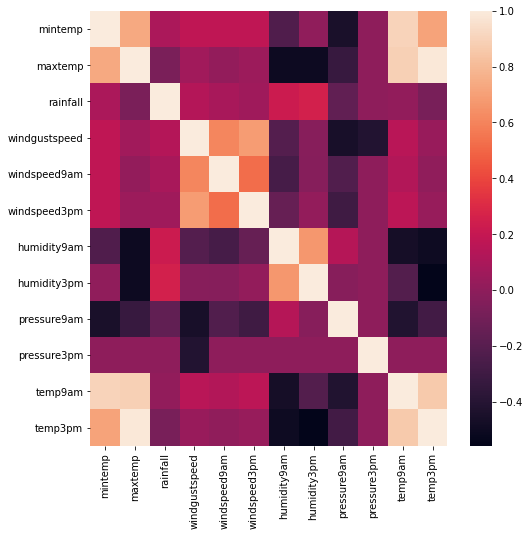

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr())

Por meio da visualização do gráfico do tipo scatterplot, observa-se a presença de uma relação linear entre a temperatura mínima e a máxima.

<AxesSubplot:xlabel='maxtemp', ylabel='mintemp'>

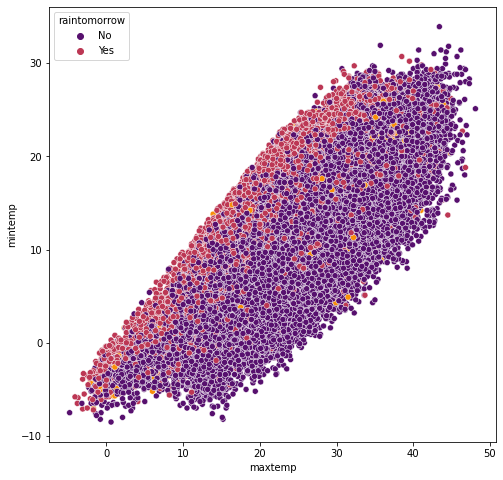

In [12]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'maxtemp', y = 'mintemp', hue = 'raintomorrow' , palette = 'inferno',data = df)

Observando o gráfico abaixo, nota-se que somente o aumento da temperatura não é suficiente para que ocorra um evento de chuva, mas que o aumento concomitante de umidade e temperatura ocasionam com maior frequencia eventos de chuva.

<AxesSubplot:xlabel='humidity9am', ylabel='temp9am'>

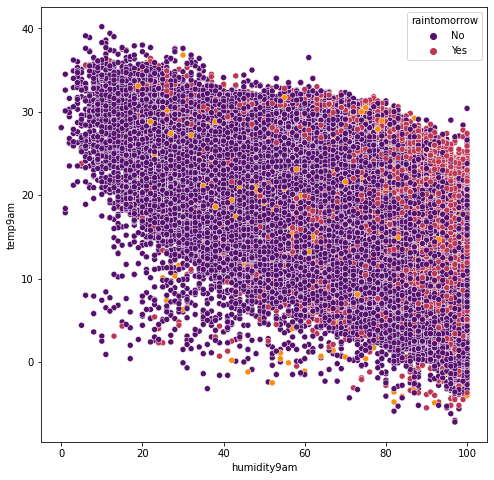

In [13]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'humidity9am', y = 'temp9am', hue = 'raintomorrow' , palette = 'inferno',data = df)

## Tratamento dos dados

O tratamento de dados é o processo responsável por transformar dados intocados em uma estrutura mais interessante, o qual podemos extrair *insights* . É nesta etapa que garantimos que os dados estão organizados, limpos e prontos para serem aplicados em modelos de *Machine Learning*. O desempenho em realizar a predição não depende apenas do modelo escolhido, mas também de como os dados foram preparados para esta tarefa.

Com a análise da presença de elementos nulos e faltantes realizada na etapa anterior, notamos que as colunas Evaporation, Sunshine, Cloud9am e Cloud3pm possuem um elevado destes elementos. Assim, estas colunas serão retiradas da análise, visando uma menor influência delas sobre os modelos que serão desenvolvidos. 

In [14]:
df.columns

Index(['date_', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow', 'dt'],
      dtype='object')

## Criando um Job

Podemos realizar um pré tratamento dos dados através da criação de um **Job**, onde criamos uma tabela tratada a partir da tabela *raw*. Para isso, os seguintes passos devem ser realizados.

(1) - Clicar no ícone **Jobs** presente na aba esquerda. Na próxima tela, devemos acionar a opnão **New Job** , presente no canto superior direito. Com isso, devemos escolher um nome e adicionar uma descrição do nosso procedimento. A seguir, devemos criar no ícone **+** presente no centro da tela. E, por fim,clicamos em **scheduler**
<center><img src="job_01.png" width=700 height=50/></center>
(2) Em seguida, assim como foi realizado na etapa **Pipeline**, devemos informar a periodicidade em que este **Job** irá ocorrer. Assim nomeamos o *job* e escolhemos a opção de ingestão a cada 24 horas. Para finalizar, devemos salvar nosso job, então devemos clicar em **save**. 
<center><img src="job_02.png" width=700 height=50/></center>
(3) Ao lado do ícone do scheduler, irá aparecer um ícone **+**. Devemos clicar nesse novo ícone e selecionar a opção **SQL**. Ao fazer isso irá aparecer uma nova caixa de fluxo, a qual devemos selecionar e editar. Então, devemos clicar na opção **Open Editor**.
<center><img src="job_03.png" width=700 height=50/></center>
(4) Ao clicarmos em **Open Editor**, uma caixa de edição será disponibilizada. Neste momento, devemos incluir as *queries* necessárias para nosso tratamento de dados. Após as colocar no editor, devemos clicar em **Save** no canto inferior direito e depois em **Apply** no canto superior direito.
<center><img src="job_04.png" width=700 height=50/></center>
Pronto ! Agora temos uma tabela tratada para ser utilizada nas demais etapas do treinamento !

## Conexão

In [15]:
conn = presto.connect(host = 'datalake-1', port = 18080, username = 'root')
dft = pd.read_sql_query('SELECT * from trusted.table_rain_prediction',conn)

In [16]:
list(dft.columns)

['mintemp',
 'maxtemp',
 'rainfall',
 'winddir9am',
 'winddir3pm',
 'windspeed9am',
 'date_',
 'windspeed3pm',
 'humidity9am',
 'humidity3pm',
 'temp9am',
 'temp3pm',
 'raintoday',
 'raintomorrow']

In [17]:
column_type = ['mintemp', 'maxtemp', 'rainfall', 'windspeed9am',
               'windspeed3pm', 'humidity9am', 'humidity3pm', 
               'temp9am','temp3pm']

dft[column_type] = dft[column_type].apply(pd.to_numeric)

In [18]:
dft.replace('',np.nan,inplace=True)

In [19]:
dft = dft.dropna(axis = 0)
dft.shape

(127033, 14)

In [20]:
dft.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'date_', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'temp9am', 'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

Calculando o número de eventos positivos e negativos para o evento de chuva:

In [21]:
dft['raintomorrow'].value_counts()

No     98746
Yes    28287
Name: raintomorrow, dtype: int64

### Codificação de variáveis categórias

Muitos algoritmos de Machine Learning não conseguem lidar com variáveis categóricas. Desta forma, para podermos aproveitá-las é necessário transformá-las em um formato que seja inteligível pelos modelos. Assim, devemos converter estas variáveis para alguma estrutura matemática, no caso escolhemos uma codificação simples, onde atribuimos um valor inteiro para cada classe. Para isso, utilizamos a biblioteca [Label Encoder - Scikit Learning](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) 


In [22]:
le = LabelEncoder()

dft['winddir9am'] = le.fit_transform(dft['winddir9am'])
dft['winddir3pm'] = le.fit_transform(dft['winddir3pm'])
dft['raintoday'] = le.fit_transform(dft['raintoday'])
dft['raintomorrow'] = le.fit_transform(dft['raintomorrow'])

Visualizando a transformação de variáveis categóricas em numéricas:

In [23]:
dft.head()

,mintemp,maxtemp,rainfall,winddir9am,winddir3pm,windspeed9am,date_,windspeed3pm,humidity9am,humidity3pm,temp9am,temp3pm,raintoday,raintomorrow
0,7.0,18.0,0.0,14,12,11.0,2014-10-02,15.0,84.0,57.0,12.0,16.0,0,0
1,10.0,20.0,1.0,11,11,6.0,2014-10-03,11.0,99.0,59.0,12.0,18.0,0,0
2,6.0,25.0,0.0,3,3,13.0,2014-10-04,30.0,47.0,35.0,20.0,24.0,0,0
3,13.0,19.0,0.0,13,8,9.0,2014-10-05,13.0,71.0,49.0,14.0,18.0,0,0
5,10.0,18.0,2.0,13,12,17.0,2014-10-07,22.0,82.0,60.0,12.0,14.0,1,0


Como podemos observar, após a transformação dos dados categóricos, agora as colunas WindGustDir, WindDir9am, WindDir3pm, RainToday e RainTomorrow estão preenchidas com valores numéricos. Agora, com estas transformações, podemos avaliar a correlação das features com a variável de interesse **RainTomorrow**. Nota-se que ela possui forte relação com as variáveis **RainToday** e **Humidity3am**

<AxesSubplot:>

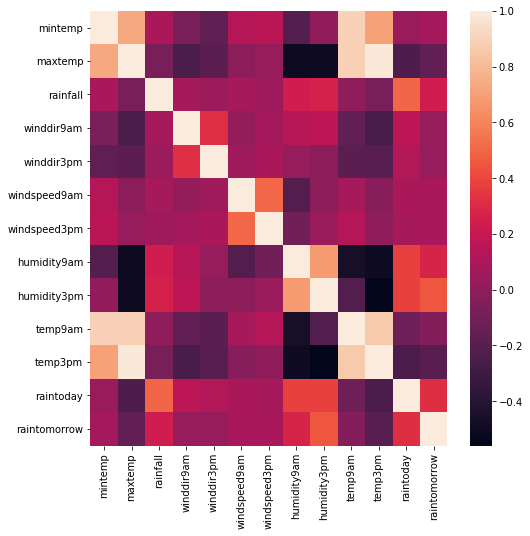

In [24]:
plt.figure(figsize = (8,8))
sns.heatmap(dft.corr())

## Construção dos Modelos

Após o tratamento dos dados, os mesmos estão preparados para a etapa de treinamento. 


Para nosso experimento, escolhemos avaliar o desempenho dos modelos de Regressão Logistica e Árvores de Decisão.

Para tanto, primeiramente, devemos definir quem é nossa variável *target*, ou seja nossa variável alvo para realizar a predição.

### Definindo a variável *target*

É necessário seccionar o *dataframe*, definindo a nossa variável *target* **RainTomorrow** como a variável y, enquanto que as demais são as *features* do modelo, armazenadas na variável X.

In [25]:
dft.reset_index(inplace=True)
X = dft.drop(['raintomorrow', 'date_'],axis=1)
y = dft['raintomorrow']

## Dividindo os dados em treino e validação

Quando avaliamos o desempenho de um modelo, ele deve ser testado em dados que nunca trabalhou. Desta forma, necessário dividir os dados que possuímos em dois grupos: Validação e Teste. O modelo irá receber os dados do conjunto de treino para ser modelado e posteriormente será avaliado no conjunto de validação. 

#### K-Fold Cross Validation
A **validação cruzada (K-Fold Cross Validation)** é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. Neste método, dividimos de forma aleatória o conjunto de dados em **K** partes. Em cada rodada, utilizaremos uma parte para validação e  as demais K-1 partes restantes serão utilizadas para o treino. Vale notar que em cada rodada a parte utilizada para a validação é diferente das anteriores, garantindo generalização do modelo. 
No nosso caso, estamos adotando k=10, ou seja, estamos dividindo o conjunto de dados em 10 subconjuntos, visando aumentar a diversidade dos dados e garantir um teste seguro, sem repetir na etapa de teste os dados que foram utilizados para 

<center><img src="CrossValidation.png" width=500 height=200/></center>

Importando as bibliotecas necessárias para utilizar o **K-Fold** e definindo o número de folks (K) que serão utilizados

In [26]:
#Importando as bibliotecas necessárias para realizar o K-Fold
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from tqdm import tqdm

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

## Modelos

<center><img src="ML.png" width=300 height=100/></center>

### Regressão Logística

A regressão logística, apesar do nome, é uma técnica estatística de classificação. Neste modelo, a função logística é utilizada  para descrever as probabilidades de cada possível resultado. A regressão logística pode ser considerada um modelo de classficação com aprendizado supervisionado. Devido à sua alta capacidade explicativa, esse modelo é bastante utilizado em diversas áreas. Para saber mais acesse: [Regressão logística](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica).


<center><img src="LogisticRegression.png" width=300 height=100/></center>

 
 
### Árvore de decisão
A árvore de decisão é um modelo de classificação e regressão treinado usando aprendizado supervisionado. O objetivo desse modelo é aprender a predizer os valores da variável *target* a partir do aprendizado de regras simples de decisão inferidas durante o treinamento. 

<center><img src="Decision.png" width=300 height=100/></center>

In [28]:
models = {'LogisticRegression': LogisticRegression(),
          'DecisionTreeClassifier': DecisionTreeClassifier()}

results = {'Models': [],
           'Accuracy': [],
           'F1-Score': []}

for train, test in tqdm(kf.split(dft), total=k):
    X_train = X.iloc[train, :]
    y_train = y[train]

    X_test = X.iloc[test, :]
    y_test = y[test]
    
    for name, model in models.items():               
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)

        f1 = f1_score(y_test, predictions, average='weighted')
        acc = accuracy_score(y_test, predictions)
        
        results['Models'].append(name)
        results['Accuracy'].append(acc)
        results['F1-Score'].append(f1)



  0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 10%|█         | 1/10 [00:19<02:57, 19.69s/it]/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

### Métricas utilizadas

Para avaliar a performance dos modelos, foram escolhidas as métricas de acurácia e F1-Score.

**Acurácia**: Com a acurácia é possível calcular a performance geral do modelo. Esta métrica leva em consideração a taxa de **falsos positivos** e **falsos negativos** na mesma proporção para penalizar o modelo.

**F1-Score**: Esta métrica combina as métricas de **precisão** e **recall** para através de um único número determinar o desempenho do modelo.

## Resultados

Após as predições realizadas pelos diferentes modelos avaliados, é possível comparar a performance de cada um deles. Para tanto, serão criados gráficos do tipo *boxplot* . Com este tipo de gráfico, é póssível observar a diferença nas propriedades de variabilidade, valores máximos, mínimos e mediana sob a análise de quartis.

#### Comparando a performance

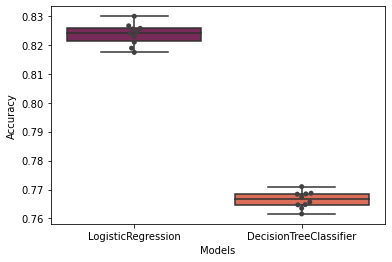

In [29]:
df_results = pd.DataFrame(results)

ax = sns.boxplot(x="Models", y="Accuracy", data=df_results, palette='rocket')
ax = sns.swarmplot(x="Models", y="Accuracy", data=df_results, color='0.25')
sns.set_style('whitegrid')


-Como podemos observar, o modelo do tipo regressão logistica teve melhor desempenho nas duas métricas avaliadas, enquanto que a árvore de decisão teve performance inferior.
-A regressão logistica teve acurácia e F1-Score de aproximadamente 82,5 % e 80,0% respectivamente.
-O modelo de árvores de decisão teve acurácia e F1-score de 76,6% e 76,9%
-Nota-se também que os modelos avaliados tiveram performance semelhante nos diferentes cenários (K folds), demonstrando a capacidade dos modelos em se adaptar na variabilidade dos dados fornecidos.  


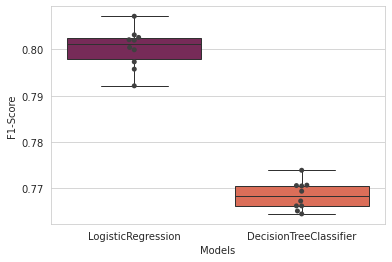

In [30]:
ax = sns.boxplot(x="Models", y="F1-Score", data=df_results,linewidth=1,palette='rocket')
ax = sns.swarmplot(x="Models", y="F1-Score", data=df_results, color='0.25')
sns.set_style('whitegrid')

### Salvando o dataframe na plataforma:

Após salvar as métricas obtidas com os modelos estudados, é necessário converter o tipo de variável presente das colunas **Accuracy e F1-Score** para o tipo numérico. Para isso, utilizamos o método **to_numeric** da biblioteca Pandas. Com esta conversão, os dados estão prontos para serem exportados para a plataforma

In [31]:
df_results[['Accuracy', 'F1-Score']] = df_results[['Accuracy', 'F1-Score']].apply(pd.to_numeric)

Visualizando o dataframe que será salvo

In [32]:
df_results

,Models,Accuracy,F1-Score
0,LogisticRegression,0.825488,0.802082
1,DecisionTreeClassifier,0.768498,0.770723
2,LogisticRegression,0.824386,0.801977
3,DecisionTreeClassifier,0.761571,0.764519
4,LogisticRegression,0.817380,0.792138
5,DecisionTreeClassifier,0.765664,0.766245
6,LogisticRegression,0.823979,0.800416
7,DecisionTreeClassifier,0.767457,0.769415
8,LogisticRegression,0.826576,0.802575
9,DecisionTreeClassifier,0.770999,0.773930


As seguintes linhas de código se encontram disponíveis como exemplo no arquivo **README.ipynb**. Com elas é possível criar uma tabela do tipo **raw** contendo as informações do dataframe model_results. Desta forma, esta tabela estará disponível no **Visualize** para posteriores visualizações e elaboração de gráficos e dashboards como demonstrado no tutorial

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('presto://datalake-1:18080/hive', echo=False)
df_results.to_sql('models_results', con=engine, schema='raw', if_exists='replace',
                  index=False, method='multi')